# Résolution numérique d'une EDO

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Équation et solution analytique

## Équation

On cherche à résoudre l'équation $$u''(x)+k^2u(x)=\delta\left(x-\frac{L}{2}\right)$$ sur l'intervalle $[0,L]$ avec les conditions aux limites $u(0)=u(L)=0$.

## Solution

La solution à cette équation est 
$$u(x)=\frac{1}{2k}\left[\sin\left(k\left|x-\frac{L}{2}\right|\right)-\tan\left(\frac{kL}{2}\right)\cos\left(k\left[x-\frac{L}{2}\right]\right)\right].$$

Cette solution est tracée ci-dessous.

In [2]:
def sol_exacte (x, L, k) :
    return 1/(2*k)*(sin(k*abs(xa-L/2))-tan(k*L/2)*cos(k*(xa-L/2)))

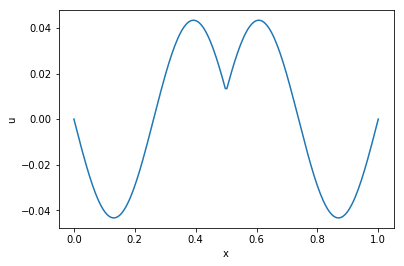

In [3]:
L = 1
k = 12

xa = linspace(0, L, num=200)

ua = sol_exacte(xa, L, k)

plot(xa,ua)
xlabel('x')
ylabel('u')
show()

# Résolution par la méthode des différences finies

On discrétise l'intervalle $[0,L]$ avec les points $x_i=i h$ avec $h=L/(N+1)$, pour $0\leq i\leq N+1$. Il y a donc $N+2$ points, mais la fonction $u(x)$ n'est inconnue que sur $N$ d'entre eux ($1\leq i\leq N$) car $u_0=u(x_0)=u(0)=1$ et $u_{N+1}=u(x_{N+1})=u(L)=0$.

On prend la discrétisation suivante pour le laplacien : 
$$u''(x)=\frac{u(x+h)-2u(x)+u(x-h)}{h^2}+\mathcal{O}(h^4).$$
La distribution de Dirac peut être discrétisée par une fonction égale à $1/h$ sur un intervalle de largeur $h$ contenant $L/2$, et égale à 0 ailleurs.

Pour $1\leq i\leq N$, l'équation discrétisée s'écrit donc 
$$u_{i+1}+(k^2h^2-2)u_i+u_{i-1} = h\delta_{i,(N+1)/2},$$
où $\delta_{i,j}$ est le symbole de Kronecker et $(N+1)/2$ est arrondi à l'entier inférieur.
On a donc bien une équation matricielle de la forme $AU=B$.

In [4]:
def diff_finies (L, k, N) :
    x = linspace(0, L, N+2)
    h = x[1]-x[0]

    # Matrices pour le problème linéaire
    A = zeros((N, N))
    diag = -2.0 + (k*h)**2
    for i in range(0, N):
        for j in range(i-1,i+2):
            if j>=0 and j<=N-1:
                if j != i:
                    A[i,j] = 1.0
                else:
                    A[i,j] = diag

    B = zeros(N)
    B[int(floor((N-1)/2))] = h

    # Résolution
    u = solve(A, B)


    # Tracé
    u = concatenate(([0], u, [0]))
    
    return u

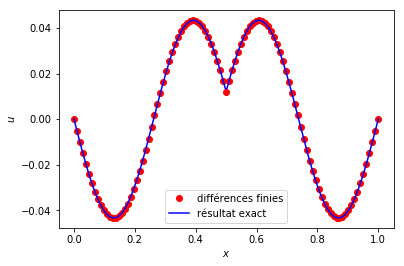

In [5]:
L = 1
k = 12
N = 101  # Nombre de points pour la discrétisation

x = linspace(0,L,N+2)

u = diff_finies(L, k, N)

plot(x, u, 'or', label='différences finies')
plot(xa, ua, 'b', label='résultat exact')
xlabel('$x$')
ylabel('$u$')
legend()
show()

# Résolution par la méthode des éléments finis

Commençons par écrire la formulation faible de l'EDP à résoudre : en multipliant l'équation par une fonction $v(x)$ nulle en $0$ et $L$, en intégrant sur $[0,L]$ et après une intégration par parties, on obtient
$$\int_0^L \left[-u'(x)v'(x)+k^2u(x)v(x)\right]dx = v\left(\frac{L}{2}\right).$$

L'étape suivante est de discrétiser l'intervalle comme pour les différences finies, et d'écrire les fonctions $u(x)$ et $v(x)$ comme des combinaisons linéaires des fonctions de base $\phi_i(x)$, affines par morceaux sur les intervalles $[x_j,x_{j+1}]$, et telles que $\phi_i(x_j)=\delta_{i,j}$. On aboutit à une équation de la forme $\sum_{i,j}v_i A_{ij} u_j = \sum_i v_i B_i$ qui doit être vraie pour tout $i$, ce qui impose $$Au=B,$$ avec
$$\begin{aligned}
A_{ij} & = \int_0^L \left[-\phi_i'(x)\phi_j'(x)+k^2\phi_i(x)\phi_j(x)\right]dx,\\
B_i & = \phi_i\left(\frac{L}{2}\right).
\end{aligned}$$
La matrice $A$ se calcule facilement :
$$A_{ij} = \left(-\frac{2}{h}+\frac{2k^2h}{3}\right)\delta_{i,j}+\left(\frac{1}{h}+\frac{k^2 h}{6}\right)\delta_{|i-j|,1}.$$
Si on suppose $N$ impair, on a pour le vecteur $B$,
$$B_i=\delta_{i,(N+1)/2}.$$

In [6]:
def elem_finis(L, k, N) :
    x = linspace(0,L,N+2)
    h = x[1]-x[0]

    # Matrices pour le problème linéaire
    A = zeros((N, N))
    for i in range(0,N):
        for j in range(i-1,i+2):
            if j>=0 and j<=N-1:
                if j != i:
                    A[i,j] =  1/h + k**2*h/6
                else:
                    A[i,j] = -2/h + k**2*2*h/3

    B = zeros(N)
    B[int(floor((N-1)/2))] = 1

    # Résolution
    u = solve(A, B)

    u = concatenate(([0], u, [0]))
    
    return u

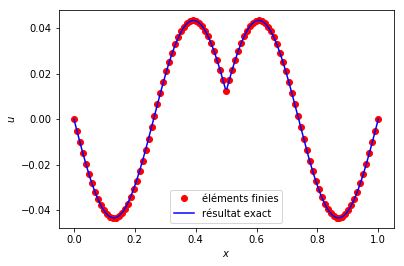

In [7]:
L = 1
k = 12
N = 101  # Nombre de points pour la discrétisation

x = linspace(0,L,N+2)

u = elem_finis(L, k, N)


plot(x, u, 'or', label='éléments finies')
plot(xa, ua, 'b', label='résultat exact')
xlabel('$x$')
ylabel('$u$')
legend()
show()

On peut comparer les deux méthodes pour un petit nombre de points de discrétisation ; on ne voit pas de tendance particulière.

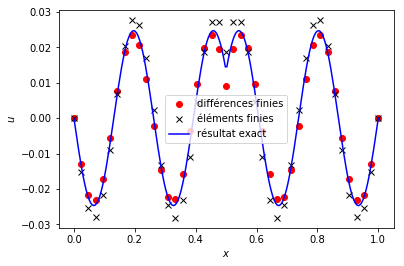

In [8]:
L = 1
k = 24
N = 41  # Nombre de points pour la discrétisation

x = linspace(0,L,N+2)

ua = sol_exacte(x, L, k)
ud = diff_finies(L, k, N)
ue = elem_finis(L, k, N)


plot(x, ud, 'or', label='différences finies')
plot(x, ue, 'xk', label='éléments finies')
plot(xa, ua, 'b', label='résultat exact')
xlabel('$x$')
ylabel('$u$')
legend()
show()